In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
dir = '/Users/signapoop/Desktop/autotune'
os.chdir(dir)
from autotune.core.HyperbandOptimiser import HyperbandOptimiser
from autotune.core.RandomOptimiser import RandomOptimiser
from autotune.core.TpeOptimiser import TpeOptimiser
from autotune.core.SigOptimiser import SigOptimiser

In [8]:
def plot_convergence(optimisers, problem_text=""):
    fig, ax = plt.subplots(1, 1, figsize=(9, 7), dpi=200)
    lines = ['--bs', '--kd', '--ro']
    for i, optimiser in enumerate(optimisers):
        ax.plot(optimiser.checkpoints, optimiser.Y_best, lines[i], label=optimiser.name)
    
    #ax.set_ylim(0.125,0.32)
    #ax.set_ylim(0.05,0.10)
    ax.grid()
    plt.ylabel('Min Test Error')
    plt.xlabel('Time (s)')
    plt.legend()
    
    res = ["{} min error = {:.4f}".format(opt.name, min(opt.Y)) for opt in optimisers]
    title = problem_text + "\n" + "\n".join(res)
    plt.title(title)
    plt.savefig(path+"/"+problem_text, dpi=200)
    plt.show()

In [9]:
problem_text = "cifar_9hps_1"
#problem_text = "tpe_test"
path = '/Users/signapoop/Desktop/results/' + problem_text
os.chdir(path)
file = open("results_sig.pkl",'rb')
object_file = pickle.load(file)
file.close()

# Unpack file
sig_opt = object_file[0]
#tpe_opt = object_file[2]

In [10]:
optimisers = [sig_opt]

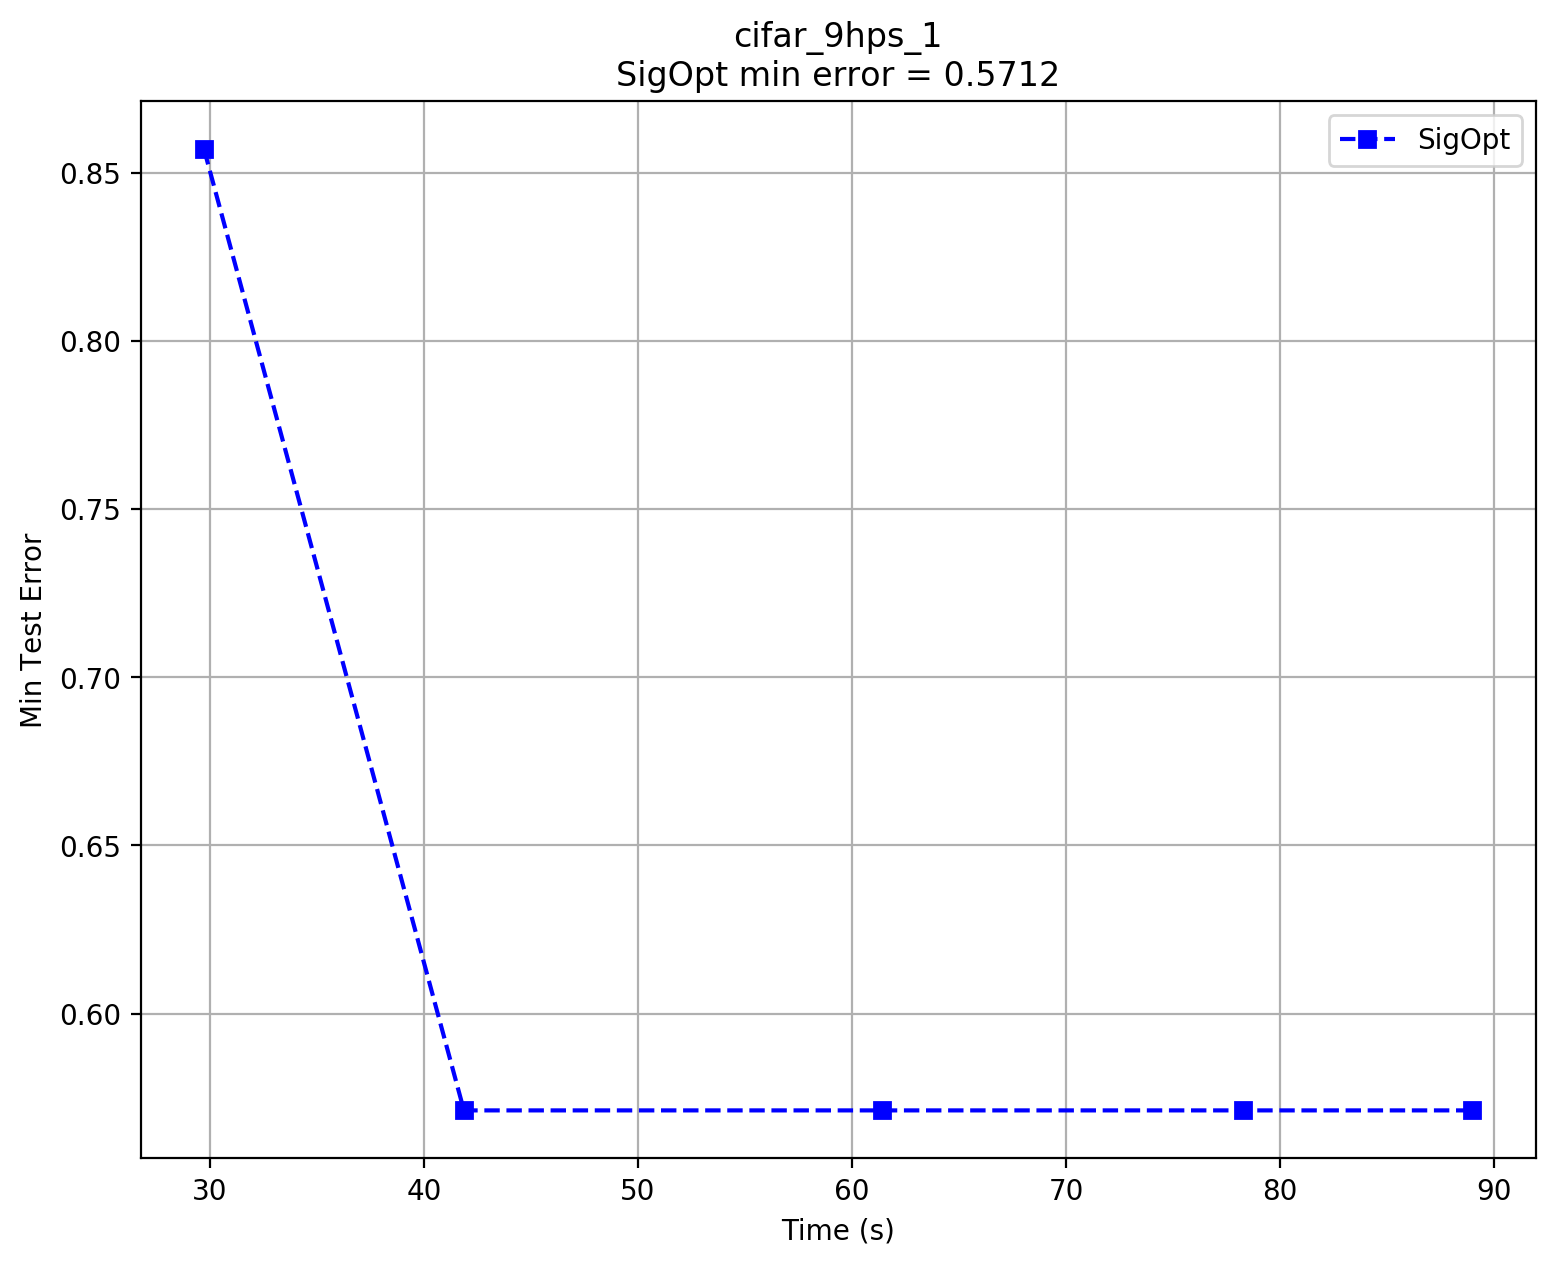

In [11]:
# Plot convergence
plot_convergence(optimisers, problem_text)